In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [69]:
dataset = pd.read_csv('global_heat_index.csv')

In [70]:
dataset.isnull().sum()

Year                     0
Month                    0
Day                      0
Hour                     0
Dew Point                0
Temperature              0
Pressure                 0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Solar Radiation (GHI)    0
dtype: int64

In [71]:
x = dataset.iloc[:,0:10]
y = dataset.iloc[:,-1]

In [72]:
y.value_counts()

Solar Radiation (GHI)
0      8831
1        74
3        71
4        33
2        33
       ... 
994       1
987       1
991       1
976       1
122       1
Name: count, Length: 992, dtype: int64

In [73]:
x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [74]:
x.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,2.672305e-16,-1.940240e-15,-5.121272e-16,-0.135341,0.009613,0.021468,-0.160733,0.023768,0.034895
1,2.672305e-16,1.000000e+00,1.189318e-02,1.926063e-16,0.477364,0.016125,-0.032611,0.450298,-0.079438,-0.202380
2,-1.940240e-15,1.189318e-02,1.000000e+00,1.175888e-16,-0.017337,-0.014386,0.048458,-0.002840,-0.022616,0.053819
3,-5.121272e-16,1.926063e-16,1.175888e-16,1.000000e+00,-0.015058,0.216774,-0.017055,-0.175876,0.057759,0.000792
4,-1.353411e-01,4.773641e-01,-1.733660e-02,-1.505770e-02,1.000000,0.303964,-0.619846,0.777350,0.226933,0.054792
5,9.613233e-03,1.612462e-02,-1.438606e-02,2.167739e-01,0.303964,1.000000,-0.629307,-0.277710,0.460840,0.161975
6,2.146818e-02,-3.261144e-02,4.845781e-02,-1.705540e-02,-0.619846,-0.629307,1.000000,-0.264376,-0.451767,-0.386357
7,-1.607333e-01,4.502985e-01,-2.839993e-03,-1.758756e-01,0.777350,-0.277710,-0.264376,1.000000,-0.021835,-0.081191
8,2.376794e-02,-7.943833e-02,-2.261611e-02,5.775914e-02,0.226933,0.460840,-0.451767,-0.021835,1.000000,0.134804
9,3.489518e-02,-2.023799e-01,5.381921e-02,7.920962e-04,0.054792,0.161975,-0.386357,-0.081191,0.134804,1.000000


<Axes: >

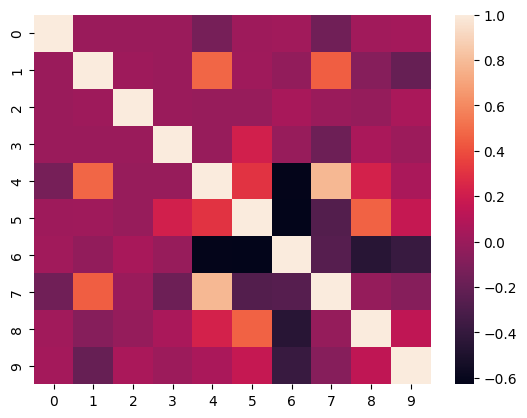

In [75]:
sns.heatmap(x.corr())

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

In [77]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [78]:
col = ['Year','Month','Day','Hour','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction','Wind Speed',]
feature_imp = pd.Series(model.feature_importances_, index = col)

In [79]:
feature_imp

Year                 0.019867
Month                0.038653
Day                  0.079152
Hour                 0.262451
Dew Point            0.070056
Temperature          0.135699
Pressure             0.098928
Relative Humidity    0.108532
Wind Direction       0.090675
Wind Speed           0.095988
dtype: float64

<Axes: >

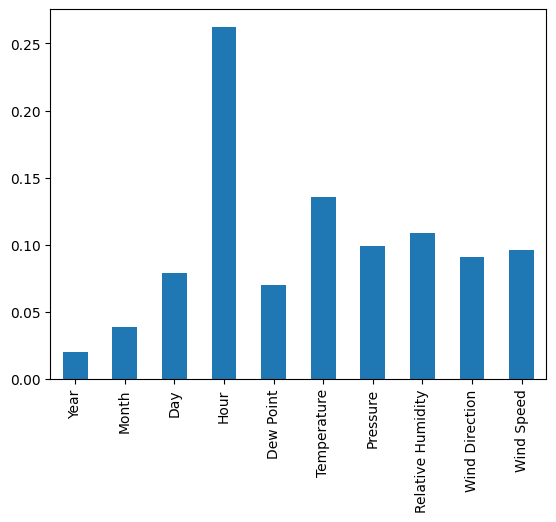

In [80]:
feature_imp.plot(kind='bar')